In [ ]:
from google.colab import drive
from scipy.io.wavfile import read
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Thesis/D1"

'Bell - 200'		    'Gunshot, gunfire - 1000'  'Silence - 200'
'Emergency vehicle - 1000'  'Music - 200'	       'Sneeze - 326'
'Explosion - 975'	    'Power tool - 1000'        'Speech - 200'


[-0.03236389 -0.05438232 -0.04423523 ...  0.          0.
  0.        ]
16000


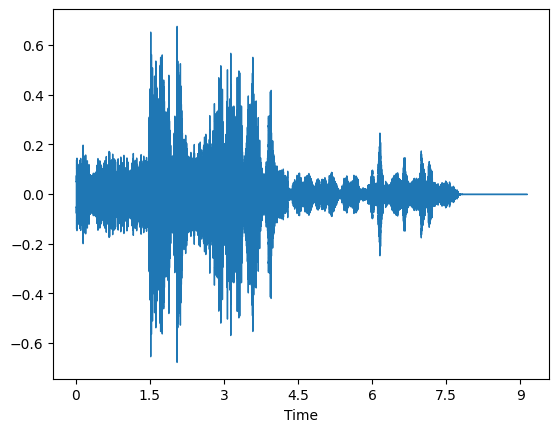

In [ ]:
path = "/content/drive/My Drive/Thesis/D1/Speech - 200/--DSvxkEeEk_6.wav"
y, sr = librosa.load(path, sr=16000)
print(y)
print(sr)
display(Audio(path, autoplay=False))
librosa.display.waveshow(y, sr=16000)

In [ ]:
def featureExtractWav(file_path, sampling_rate = 16000, desired_length=10):
    """
    file_path: The absolute path to the sound file (wav).
    sampling_rate: The number of samples taken per second.
    desired_length: The desired length of the feature extraction (seconds).
    """
    y, sr = librosa.load(file_path, sr=sampling_rate)

    final_length = desired_length * sampling_rate

    # Pad or truncate the audio time series
    if len(y) < final_length:
        y_padded = np.pad(y, (0, final_length - len(y)))
    else:
        y_padded = y[:final_length]

    silence_th = 0.35
    silence_count = 0
    for p in y_padded:
        if p == 0:
            silence_count += 1

    has_relevant_silence = False
    if (silence_count/final_length > silence_th):
        has_relevant_silence = True


    return y_padded, has_relevant_silence

In [ ]:
def processMelSpectogram():
    base_directory_path = '/content/drive/My Drive/Thesis/D1/'
    print(os.listdir(base_directory_path))
    # Iterate through folders in path
    base_directory_folders_list = os.listdir(base_directory_path)
    for folder in base_directory_folders_list:
        directory_path = os.path.join(base_directory_path, folder)
        # Iterate through files in the directory
        MAX_FILES = 1000
        i = 0
        directory_path_folders_list = os.listdir(directory_path)
        for filename in directory_path_folders_list:
            if i >= MAX_FILES:
                break
            file_path = os.path.join(directory_path, filename)
            dir = directory_path + '/output_images'
            if not os.path.exists(dir):
                os.makedirs(dir)
            image_path = dir + '/' + filename.replace('.wav', '.png')
            silence_file_path = directory_path + '/silence.txt'
            if (
                os.path.isfile(file_path)
                and not os.path.exists(image_path)
                and file_path != silence_file_path
                ):
                """
                Load an audio file as a floating point time series.
                Audio will be automatically resampled to the given rate (default sr=22050).
                To preserve the native sampling rate of the file, use sr=None.
                """
                y, has_relevant_silence = featureExtractWav(file_path)
                mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=16000)
                target_size = 300  # Desired image size in pixels
                fig_width = target_size / 100
                plt.figure(figsize=(fig_width, fig_width), dpi=100)
                librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
                plt.tight_layout()
                plt.axis('off')

                if(has_relevant_silence):
                    with open(silence_file_path, "a+") as myfile:
                        myfile.write(filename + '\n')
                plt.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
                plt.close()
            else:
                # print(f'Skipping {image_path}, already found.')
                pass
            i += 1

In [ ]:
processMelSpectogram()

['Speech - 200', 'Bell - 200', 'Music - 200', 'Silence - 200', 'Sneeze - 326', 'Power tool - 1000', 'Explosion - 975', 'Emergency vehicle - 1000', 'Gunshot, gunfire - 1000']


In [ ]:
def processWaveshow():
    base_directory_path = '/content/drive/My Drive/Thesis/D1/'
    print(os.listdir(base_directory_path))
    # Iterate through folders in path
    base_directory_folders_list = os.listdir(base_directory_path)
    for folder in base_directory_folders_list:
        directory_path = os.path.join(base_directory_path, folder)
        # Iterate through files in the directory
        MAX_FILES = 100
        i = 0
        directory_path_folders_list = os.listdir(directory_path)
        for filename in directory_path_folders_list:
            if i >= MAX_FILES:
                break
            file_path = os.path.join(directory_path, filename)
            dir = directory_path + '/output_images_wave_show'
            if not os.path.exists(dir):
                os.makedirs(dir)
            image_path = dir + '/' + filename.replace('.wav', '.png')
            silence_file_path = directory_path + '/silence.txt'
            if (
                os.path.isfile(file_path)
                and not os.path.exists(image_path)
                and file_path != silence_file_path
                ):
                """
                Load an audio file as a floating point time series.
                Audio will be automatically resampled to the given rate (default sr=22050).
                To preserve the native sampling rate of the file, use sr=None.
                """
                y, has_relevant_silence = featureExtractWav(file_path)
                target_size = 300  # Desired image size in pixels
                fig_width = target_size / 100
                plt.figure(figsize=(fig_width, fig_width), dpi=100)
                librosa.display.waveshow(y, sr=16000)
                plt.tight_layout()
                plt.axis('off')

                if(has_relevant_silence):
                    with open(silence_file_path, "a+") as myfile:
                        myfile.write(filename + '\n')
                plt.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
                plt.close()
            else:
                # print(f'Skipping {image_path}, already found.')
                pass
            i += 1

In [ ]:
processWaveshow()

['Speech - 200', 'Bell - 200', 'Music - 200', 'Silence - 200', 'Sneeze - 326', 'Power tool - 1000', 'Explosion - 975', 'Emergency vehicle - 1000', 'Gunshot, gunfire - 1000']


In [ ]:
def processSpectrogram():
    base_directory_path = '/content/drive/My Drive/Thesis/D1/'
    print(os.listdir(base_directory_path))
    # Iterate through folders in path
    base_directory_folders_list = os.listdir(base_directory_path)
    for folder in base_directory_folders_list:
        directory_path = os.path.join(base_directory_path, folder)
        # Iterate through files in the directory
        MAX_FILES = 100
        i = 0
        directory_path_folders_list = os.listdir(directory_path)
        for filename in directory_path_folders_list:
            if i >= MAX_FILES:
                break
            file_path = os.path.join(directory_path, filename)
            dir = directory_path + '/output_images_spectrogram'
            if not os.path.exists(dir):
                os.makedirs(dir)
            image_path = dir + '/' + filename.replace('.wav', '.png')
            silence_file_path = directory_path + '/silence.txt'
            if (
                os.path.isfile(file_path)
                and not os.path.exists(image_path)
                and file_path != silence_file_path
                ):
                """
                Load an audio file as a floating point time series.
                Audio will be automatically resampled to the given rate (default sr=22050).
                To preserve the native sampling rate of the file, use sr=None.
                """
                y, has_relevant_silence = featureExtractWav(file_path)
                target_size = 300  # Desired image size in pixels
                fig_width = target_size / 100
                plt.figure(figsize=(fig_width, fig_width), dpi=100)
                D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
                librosa.display.specshow(D, sr=16000)
                plt.tight_layout()
                plt.axis('off')

                if(has_relevant_silence):
                    with open(silence_file_path, "a+") as myfile:
                        myfile.write(filename + '\n')
                plt.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
                plt.close()
            else:
                # print(f'Skipping {image_path}, already found.')
                pass
            i += 1

In [ ]:
processSpectrogram()

['Speech - 200', 'Bell - 200', 'Music - 200', 'Silence - 200', 'Sneeze - 326', 'Power tool - 1000', 'Explosion - 975', 'Emergency vehicle - 1000', 'Gunshot, gunfire - 1000']
